<a href="https://colab.research.google.com/github/Hooded-dev/CollabFiltering/blob/main/LSTM_trail_OG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
!pip install scikit-plot
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

In [41]:
ntrain = pd.read_csv('/content/text_emotion.csv', sep =',', encoding='utf-8')
ntest = pd.read_csv('/content/text emo.txt', sep =',', encoding='utf-8')

In [42]:
ntrain.head(7)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."


In [43]:
ntrain['content'] = ntrain['content'].str.replace('\@[a-zA-Z0-9]*', '',regex=True)
ntrain['content'] = ntrain['content'].str.lower()
ntrain=ntrain.drop(columns=['tweet_id','author'])
ntest['content'] = ntest['content'].str.replace('\@[a-zA-Z0-9]*', '',regex=True)
ntest['content'] = ntest['content'].str.lower()
ntest=ntest.drop(columns=['tweet_id','author'])
#df[c].str.replace('[^\d.]', '')
#re.sub('\@[a-zA-Z0-9]*', ' ', text)

In [44]:
ntrain.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

### Reading train and validation data

In [45]:
X=ntrain['content']

In [46]:
lst=[]
for i in X:
  lst.append(len(i))

In [47]:
len1=pd.DataFrame(lst)

In [48]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)


## Try to fix the length of the embadding layers input

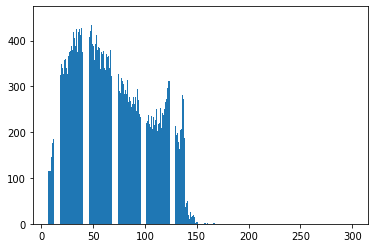

In [49]:
plt.bar(range(7,301),cts)
plt.show()

## Using the tokenizer Class to convert the sentences into word vectors

In [50]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [51]:
len(tokenizer.word_index)

33873

In [52]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [235]:
ntrain['sentiment'].unique()

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0])

In [236]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ntrain['sentiment']= le.fit_transform(ntrain['sentiment'])

In [237]:
Y_train=ntrain['sentiment'].values

In [238]:
Y_train_f=to_categorical(Y_train)

In [239]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, y_train, = train_test_split(ntrain,  test_size=0.33, random_state=42)

In [240]:
X_val=y_train['content']
X_val

32823                                         good morning
16298    i just put my computer up on craigslist. i've ...
28505    in ten minutes shopping   demi lovato-back aro...
6689     from twitterberry moved to ubertwitter - suffe...
26893                                                tear*
                               ...                        
35934    the sun is shining brightly and the day has ju...
403                                      my dog ran awayyy
35953     hi  you are such a babe. want to hang? i love...
14218    im feeling like ish!  i just wanna go home and...
4736     i think my cheap sunglasses are falling apart....
Name: content, Length: 13200, dtype: object

In [63]:
y_val=y_train.sentiment.values

In [64]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [65]:
Y_val_f=to_categorical(y_val)

In [66]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [67]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(13,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            973568    
                                                                 
 dropout (Dropout)           (None, 80, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 80, 160)          92800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 320)              410880    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 13)                4173      
                                                                 
Total params: 1,481,421
Trainable params: 1,481,421
Non-

In [68]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
1250/1250 [==============================] - 607s 481ms/step - loss: 2.0013 - accuracy: 0.3088 - val_loss: 1.8480 - val_accuracy: 0.3686
Epoch 2/12
1250/1250 [==============================] - 596s 477ms/step - loss: 1.8607 - accuracy: 0.3673 - val_loss: 1.7629 - val_accuracy: 0.4120
Epoch 3/12
1250/1250 [==============================] - 599s 479ms/step - loss: 1.7855 - accuracy: 0.3958 - val_loss: 1.6659 - val_accuracy: 0.4489
Epoch 4/12
1250/1250 [==============================] - 601s 481ms/step - loss: 1.7207 - accuracy: 0.4184 - val_loss: 1.5723 - val_accuracy: 0.4800
Epoch 5/12
1250/1250 [==============================] - 602s 481ms/step - loss: 1.6583 - accuracy: 0.4436 - val_loss: 1.5045 - val_accuracy: 0.5123
Epoch 6/12
1250/1250 [==============================] - 596s 477ms/step - loss: 1.5953 - accuracy: 0.4669 - val_loss: 1.3959 - val_accuracy: 0.5473
Epoch 7/12
1250/1250 [==============================] - 591s 472ms/step - loss: 1.5359 - accuracy: 0.4915 - val_

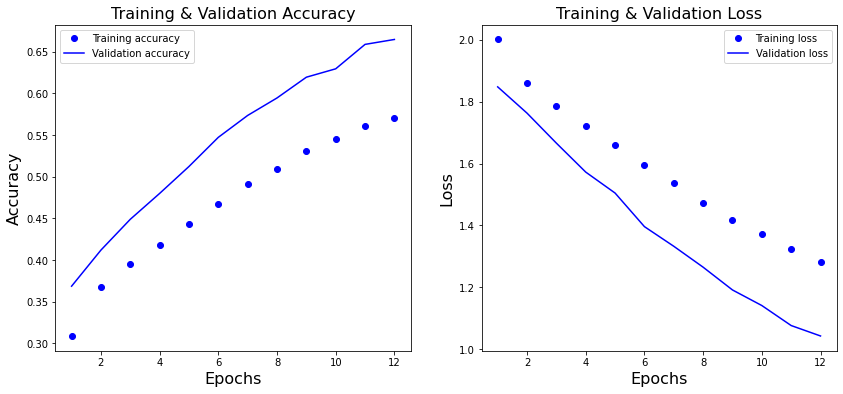

In [74]:
import matplotlib.pyplot as plt
 
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## Checking test dataset

In [215]:
X_test=ntest['content']
ntrain['sentiment']= le.fit_transform(ntrain['sentiment'])
Y_test=ntrain['sentiment']

In [220]:
X_test_f=tokenizer.texts_to_sequences(X_test)

In [218]:
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [221]:
X_test_pad.shape

(39673, 80)

In [202]:
Y_test_f=to_categorical(Y_test)

In [203]:
Y_test_f.shape

(40000, 13)

In [204]:
X_test_pad.shape

(39673, 80)

In [205]:
Y_test_f1 = Y_test_f[:-327]

In [206]:
Y_test_f1.shape

(39673, 13)

In [ ]:
#while True:pass

## Saving model


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
model.save('/content/drive/MyDrive/LSTM_model/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM_model/assets


## Accuracy 

In [208]:
model.evaluate(X_test_pad,Y_test_f1)

1240/1240 [==============================] - 170s 137ms/step - loss: 3.0301 - accuracy: 0.1998


[3.03012752532959, 0.19975802302360535]

## Load model

In [209]:
model = keras.models.load_model('/content/drive/MyDrive/LSTM_model/')

## Plotting confusion matrix

In [210]:
from keras.models import Sequential

In [211]:
Y_pred = np.argmax(model.predict(X_test_pad), axis=-1)

In [224]:
Y_test = Y_test[:-327]

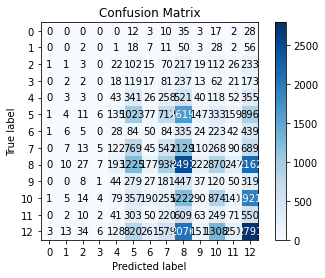

In [225]:
plot_confusion_matrix(Y_test,Y_pred)

In [226]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       178
           2       0.02      0.00      0.01       821
           3       0.00      0.00      0.00       745
           4       0.05      0.02      0.03      1760
           5       0.19      0.20      0.19      5123
           6       0.05      0.04      0.04      1321
           7       0.14      0.14      0.14      3789
           8       0.23      0.29      0.25      8569
           9       0.04      0.02      0.03      1513
          10       0.19      0.17      0.18      5153
          11       0.06      0.03      0.04      2170
          12       0.26      0.33      0.29      8421

    accuracy                           0.20     39673
   macro avg       0.09      0.10      0.09     39673
weighted avg       0.18      0.20      0.19     39673



## Function for inputs

In [227]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key
        
        

In [228]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(np.argmax(model.predict(sentence_padded)))
  print("The emotion predicted is",ans)
    

## Test your inputs

In [229]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : wow
The emotion predicted is None


In [230]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : What is your problem
The emotion predicted is None
